In [14]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sys
import h5py

from numpy import loadtxt
from os import listdir

In [611]:
from __future__ import division, print_function

import illustris_api as ia

import matplotlib.pyplot as pyplot

# Illustris API Configuration
ia.set_apikey('4e2c93455bbc8e991a91a61ef5e11daa')

h = 0.704 # Apparently

# 0.0097 to 0.00971 has nearly 40,000 subhalos??
# ended here

z = 0.6
snap = 99
# lower = 0.0755
# upper = 0.0756

lower = 0.0199
upper = 0.02

def test_plot(fname):
    f = h5py.File(fname,'r')
    x = f['PartType0']['Coordinates'][:,0]
    z = f['PartType0']['Coordinates'][:,1]
    dens = numpy.log10(f['PartType0']['Masses'][:])
    import matplotlib.pyplot as pyplot
    pyplot.figure()
    pyplot.hist2d(z,x,weights=dens,bins=[150,100])
    pyplot.show()


files = None
#files = ['cutout_41094.hdf5.orig'] # uncomment and set this to suppress to downloading

if files is None: 

    halo_data_prelim = ia.obtain_halos_by_mass(lower, upper, snap)

    c = halo_data_prelim['count']
    if ia.DEBUG: print(c)

    halo_ids, halo_data = ia.obtain_subhalos_data(halo_data_prelim, snap, z)

    halo_ids, halo_data = ia.filter_haloids(halo_ids, halo_data, filters=[ia.filter_non_zero_mass, ia.filter_star_mass, ia.filter_fluid_mass], args=[None, {'lower': 0.0001, 'upper': 0.0995}, {'lower': 0.00001, 'upper': 0.01}])

    if ia.DEBUG: print(halo_ids[:])

    ia.store_metadata(halo_data)
    
    # This is an example of how to unpickle, not a real bit of code :-)
    # You probably don't want to uncomment this!S
    #new_halos = ia.load_metadata(['data_9.pickle', 'data_66085.pickle', 'data_183685.pickle'])
    #print(len(new_halos))

    files = ia.obtain_cutouts(halo_data, gascols=['Coordinates', 'Density', 'GFM_Metallicity', 'Masses', 'SmoothingLength', 'Velocities'], starcols=['Coordinates', 'Masses', 'Velocities','GFM_Metallicity'], count=None)

    Ldata = []
    ia.detilt_files(files, halo_data, L_outputs=Ldata)
    if ia.DEBUG: print(Ldata)

ia.process_cutouts_for_splash(files)

Setting API Key to 4e2c93455bbc8e991a91a61ef5e11daa
 Obtaining subhalos in mass range 0.0199 to 0.02 at snapshot 99.000000
   243 subhalos will be obtained in 100-element chunks
 Obtaining metadata for 243 subhalos
     0 % done
     10 % done
     20 % done
     30 % done
     40 % done
     50 % done
     60 % done
     70 % done
     80 % done
     90 % done
     100 % done
Initial idn set = 243
243
Applying filter filter_non_zero_mass
 0 eliminated due to less than epsilon mass
 1 eliminated due to less than epsilon mass
 2 eliminated due to less than epsilon mass
 3 eliminated due to less than epsilon mass
 4 eliminated due to less than epsilon mass
 5 eliminated due to less than epsilon mass
 6 eliminated due to less than epsilon mass
 7 eliminated due to less than epsilon mass
 8 eliminated due to less than epsilon mass
 9 eliminated due to less than epsilon mass
 10 eliminated due to less than epsilon mass
 11 eliminated due to less than epsilon mass
 12 eliminated due to less 

 Obtaining cutout of halo 478825 at redshift 0.600000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 551510 at redshift 0.600000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 700563 at redshift 0.600000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
Limiting angular momentum calculation to r < 0.9531
Limiting angular momentum calculation to r < 1.1093
Limiting angular momentum calculation to r < 0.58
Limiting angular momentum calculation to r < 2.6776
 "splashifying" cutout_454453.hdf5, output will be saved to cutout_454453_splash.hdf5
 "splashifying" cutout_478825.hdf5, output will be saved to cutout_478825_splash.hdf5
 "splashifying" cutout_551510.hdf5, output will be s

/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=0.6/illustris_api.py:1037: RuntimeWarning: invalid value encountered in true_divide
  Lhat = totL/modL # this is the direction the total angular momentum vector points


In [612]:
stellar_mass = []
fluid_mass = []
virial_mass = []


for h in halo_data:
    stellar_mass.append(h['mass_stars'])
    fluid_mass.append(h['mass_gas'])
    
    
for i in range(0,len(halo_data_prelim['results'])):
    for j in range(0,len(halo_ids)):
        if halo_data_prelim['results'][i]['id'] == halo_ids[j]:
            virial_mass.append(halo_data_prelim['results'][i]['mass_log_msun'])
            
print(halo_ids)    
print(stellar_mass)
print(fluid_mass)
print(virial_mass)


[454453, 478825, 551510, 700563]
[0.000213, 0.000395, 0.000204, 0.000122]
[0.001258, 0.002851, 0.002584, 0.004403]
[8.453196681628437, 8.453457336521868, 8.45308802923441, 8.452500836125031]


In [613]:
def get_HI(halo_ids):
    f = []
    HI = []
    mean = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=0.6/cutout_'+str(i)+'.hdf5', 'r')
        HI.append(f['PartType0']['NeutralHydrogenAbundance'][:])
        
    for j in range(0,len(HI)):
        mean.append(numpy.ndarray.mean(HI[j]))

    return mean

In [614]:
HI_abundance = get_HI(halo_ids)
print(HI_abundance)
print(halo_ids)

[0.80328774, 0.87231576, 0.7519039, 0.86872166]
[454453, 478825, 551510, 700563]


In [615]:
def get_HI_mass(HI_abundance,fluid_mass):
    
    m_p = 1.6726219e-27 * (1 / 1.989e30) * (1 / 10e10) * 0.704 # units of 10^10 Msol/h
    number_density = []
    MHI = []
    
    for m in fluid_mass:
        n = m / m_p # take fluid mass and divide by mass of proton to get number density of Hydrogen
        number_density.append(n)
        
    for i in range(0,len(HI_abundance)):
        
        n_HI = HI_abundance[i] * number_density[i]
        mhi = n_HI * m_p
        MHI.append(mhi)
        
    return MHI

In [616]:
HI = get_HI_mass(HI_abundance,fluid_mass)
print(HI)
print(fluid_mass)
print(halo_ids)

[0.001010535982608795, 0.0024869722443819045, 0.0019429196557998658, 0.0038249814863801]
[0.001258, 0.002851, 0.002584, 0.004403]
[454453, 478825, 551510, 700563]


In [617]:
# Only appends Lhat vectors that have values. Removes nan values
Lhat = []
entry = []
for i in range(0,len(Ldata)):
    Lhat.append(Ldata[i][2])
    angm = Ldata[i][2]
    if abs(angm[0])>0:
        #Lhat.append(Ldata[i][2])
        entry.append(i)
        
print(Lhat)

[array([nan, nan, nan], dtype=float32), array([ 0.52931416, -0.05295774, -0.8467715 ], dtype=float32), array([nan, nan, nan], dtype=float32), array([ 0.33561447, -0.9399513 ,  0.06208409], dtype=float32)]


In [618]:
def get_coordinates(fname):
    f = h5py.File(fname,'r')
    x = f['PartType0']['Coordinates'][:,0]
    z = f['PartType0']['Coordinates'][:,1]
    y = f['PartType0']['Coordinates'][:,2]
    
    return x,y,z

In [619]:
def metallicity_plot(fname,Lhat):
    f = h5py.File(fname,'r')
    x = f['PartType0']['Coordinates'][:,0]
    z = f['PartType0']['Coordinates'][:,1]
    y = f['PartType0']['Coordinates'][:,2]
    
    met = f['PartType0']['GFM_Metallicity'][:]/0.0127
    
    import matplotlib as mpl
    import matplotlib.pyplot as plt

    
    plt.figure()
    plt.hist2d(z,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('YZ-plane')

    plt.figure()
    plt.hist2d(x,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('XY-plane')

    plt.figure()
    plt.hist2d(z,x,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('XZ-plane')
    
    print("------------------------Best cutout--------------------------")
    

    if abs(Lhat[0]) >= abs(Lhat[1]) and abs(Lhat[0]) >= abs(Lhat[2]):
        plt.figure()
        plt.hist2d(z,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('YZ-plane')

    if abs(Lhat[1]) >= abs(Lhat[0]) and abs(Lhat[1]) >= abs(Lhat[2]):
        plt.figure()
        plt.hist2d(x,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('XY-plane')

    if abs(Lhat[2]) >= abs(Lhat[0]) and abs(Lhat[2]) >= abs(Lhat[1]):
        plt.figure()
        plt.hist2d(z,x,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('XZ-plane')
        
        
    print(min(met),max(met))
    print(Lhat)
    print("------------------------Best cutout--------------------------")

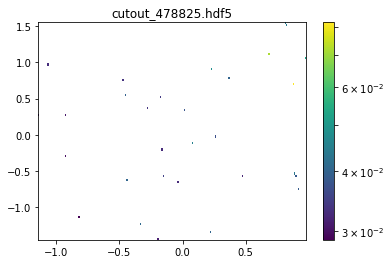

YZ-plane


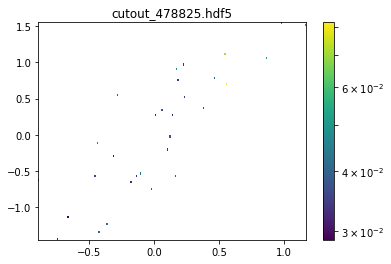

XY-plane


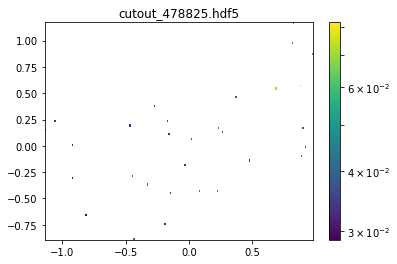

XZ-plane
------------------------Best cutout--------------------------


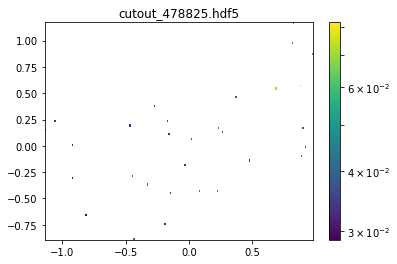

XZ-plane
0.028754072 0.08190639
[ 0.52931416 -0.05295774 -0.8467715 ]
------------------------Best cutout--------------------------


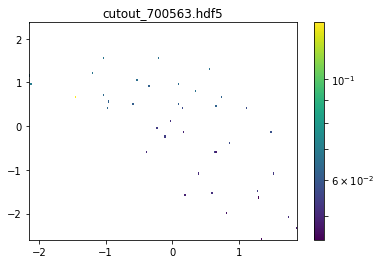

YZ-plane


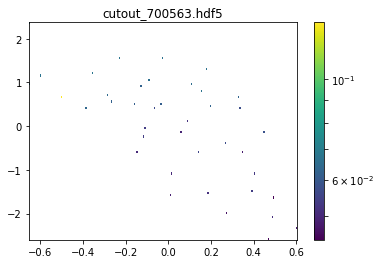

XY-plane


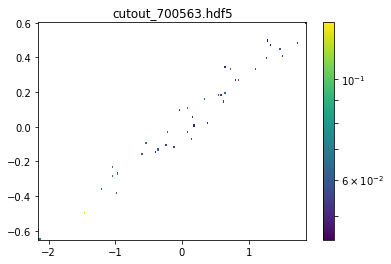

XZ-plane
------------------------Best cutout--------------------------


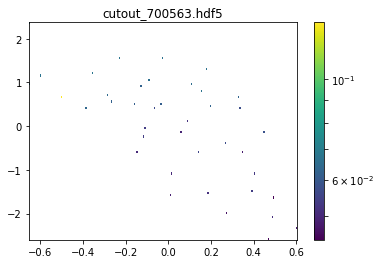

XY-plane
0.044263892 0.07031066
[ 0.33561447 -0.9399513   0.06208409]
------------------------Best cutout--------------------------


In [620]:
for i in entry:
    metallicity_plot('cutout_'+str(halo_ids[i])+'.hdf5',Lhat[i]) 

In [621]:
def get_metallicity(halo_ids):
    f = []
    Z = []
    mean = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=0.6/cutout_'+str(i)+'.hdf5', 'r')
        Z.append(f['PartType0']['GFM_Metallicity'][:]/0.0127)
    for j in range(0,len(Z)):
        mean.append(numpy.ndarray.mean(Z[j]))

    return mean

In [622]:
def get_SFR(halo_ids):
    f = []
    SFR = []
    mean = []
    total = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=0.6/cutout_'+str(i)+'.hdf5', 'r')
        SFR.append(f['PartType0']['StarFormationRate'][:])
    for j in range(0,len(SFR)):
        mean.append(numpy.ndarray.mean(SFR[j]))
    for k in range(0,len(SFR)):
        total.append(numpy.ndarray.sum(SFR[k]))

    return total

In [623]:
metallicity = get_metallicity(halo_ids)
print(metallicity)
#print(numpy.mean(metallicity))

starformation = get_SFR(halo_ids)
print(starformation)

[0.2731724, 0.040184796, 0.33872417, 0.058523864]
[0.0023561819, 0.0033339113, 0.0057585523, 0.0040893964]


In [624]:
with open("master_dwarf_z=0.6.txt", "a") as myfile:
    for i in range(0,len(halo_ids)):
        ids = halo_ids[i],stellar_mass[i],fluid_mass[i],virial_mass[i],HI_abundance[i], HI[i], [Lhat[i][0],Lhat[i][1],Lhat[i][2]], metallicity[i], starformation[i]
        myfile.write(str(ids)+'\n')

In [438]:
def get_metallicity(halo_ids):
    f = []
    Z = []
    mean = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/cutout_'+str(i)+'.hdf5', 'r')
        Z.append(f['PartType0']['GFM_Metallicity'][:]/0.0127)
    for j in range(0,len(Z)):
        mean.append(numpy.ndarray.mean(Z[j]))

    return mean

In [ ]:
def get_SFR(halo_ids):
    f = []
    SFR = []
    mean = []
    total = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/cutout_'+str(i)+'.hdf5', 'r')
        SFR.append(f['PartType0']['StarFormationRate'][:])
    for j in range(0,len(SFR)):
        mean.append(numpy.ndarray.mean(SFR[j]))
    for k in range(0,len(SFR)):
        total.append(numpy.ndarray.sum(SFR[k]))

    return total

In [169]:
metallicity = get_metallicity(halo_ids)
print(metallicity)

starformation = get_SFR(halo_ids)
print(starformation)

converted_stellar_mass = []
for i in stellar_mass:
    x = i*1e10*0.704
    converted_stellar_mass.append(x)


[0.69150203, 0.23054741]
[0.025253218, 0.0007354362]


In [168]:
def readData(filename):
    #Reads data from a file output from the 'writeData' function into an array that (hopefully) is of the same format as the original
    file = open(filename,'r')
    #Initializes an empty list that will become the returned all_data array
    data = []
    #Two boolean flags for handling the 'L_data' sublist (theres easier ways to do this [tracking variables])
    flag1 = False
    flag2 = False
    #Initializes an empty sublist for L_data, to prevent reference-before-assignment errors
    L_list = []
    #Tracks current line number, only needed for the header (element 0)
    track2 = 0
    for line in file:
        #Initializes the empty sublist (becomes primary array element)
        subList = []
        #uses the built in split function to seperate a line of text into a list of strings, based on whitespace
        els = str.split(line)
        #Bad variable names, but itrates through the now seperated line elements
        for el in els:
            #Does no processing to the header
            if track2 == 0:
                subList.append(el)
        
            else:
                #Uses the retained square bracket from the start of the L_data list to start building that list
                if el[0] == '[':
                    #Appends first element of L_data ([1:-1] excludes '[' and ','])
                    L_list.append(float(el[1:-1]))
                    #sets a flag so L_data element 2 is added properly
                    flag1 = True
                #Adds L_data element 2, and sets flag for third element
                elif flag1 == True and flag2 == False:
                    L_list.append(float(el[:-1]))
                    flag2 = True
                #adds third L_data element, resets flags, appends now complete L_data list to primary element, and resets L_data
                elif flag1 == True and flag2 == True:
                    L_list.append(float(el[:-1]))
                    flag1 = False
                    flag2 = False
                    subList.append(L_list)
                    L_list = []
                #If the current element is not a member of L_data, it simply adds it to the primary element
                else:
                    subList.append(float(el))
        #Adds the now complete primary element to the main list, and counts up one line number
        data.append(subList)
        track2 += 1
    #returns the all_data array
    return(data)

In [170]:
readData('master_dwarf_z=0.2.txt')

ValueError: could not convert string to float: '(273994,'

In [15]:
all_data = [['halo_ids', 'stellar_mass', 'fluid_mass', 'virial_mass', 'HI_abundance', 'HI', 'Lhat', 'metallicity', 'starformation'],            
[259352, 0.000496, 0.009555, 8.154636613845902, 0.9094237, 0.008689543538689613, [0.8447989, 0.43910074, -0.30578637], 1.470768, 0.007961232],
[469003, 0.000221, 0.009809, 8.15377157126949, 0.9714497, 0.009528949844181537, [-0.96505183, -0.2617381, 0.012962732], 0.9593081, 0.0016428255],
[513827, 0.000138, 0.009521, 8.15674871464053, 0.9601881, 0.009141950812518597, [-0.6098026, 0.23754974, 0.7561156], 0.15635185, 0.002637837],
[520464, 0.00022, 0.009827, 8.154463743117416, 0.93603843, 0.009198449695885182, [0.8897698, 0.20340092, 0.4085801], 0.8762261, 0.0061007477],
#(525461, 0.000104, 0.009991, 8.156533664137546, 0.97536707, 0.009744892388820647, [nan, nan, nan], 0.48715872, 0.0016933051)
[535156, 0.000197, 0.009811, 8.152774637543251, 0.9707823, 0.009524344948768616, [0.7671823, -0.1905948, -0.6124581], 0.3643904, 0.0021290886],
#(535820, 0.000128, 0.009924, 8.154679820778426, 0.95428723, 0.00947034648013115, [nan, nan, nan], 0.5208791, 0.004153257)
#(544944, 0.000266, 0.009363, 8.155456811411506, 0.9620646, 0.009007811072945595, [nan, nan, nan], 0.08475877, 0.0009001497)
#(618121, 0.000142, 0.009895, 8.154031265007685, 0.9584057, 0.009483424139320849, [nan, nan, nan], 0.1411336, 0.002677769)
[333222, 0.000369, 0.009635, 8.152601023916352, 0.78069335, 0.0075219804486632335, [-0.023094883, 0.6476918, -0.7615524], 0.26583168, 0.01818797],
#(353265, 0.000114, 0.009975, 8.156275462892186, 0.86791843, 0.008657486356794834, [nan, nan, nan], 0.5809524, 0.00031175456)
[355076, 0.000124, 0.009926, 8.154593402614395, 0.8892111, 0.008826309559464457, [0.5024862, -0.8644005, -0.017869625], 0.6707811, 0.006396088],
[398932, 0.000815, 0.009229, 8.154334044898773, 0.8281664, 0.007643147938430308, [0.8691254, -0.4510525, 0.20291013], 0.41485074, 0.011509847],
[423542, 0.000241, 0.009844, 8.156146304681002, 0.8830768, 0.00869300789117813, [0.43616992, -0.8992826, -0.032350894], 0.42299023, 0.00672107],
#(447589, 0.000105, 0.009505, 8.154593402614395, 0.91429985, 0.008690420033335686, [nan, nan, nan], 0.066955045, 0.0015757596)
#(448600, 0.000121, 0.00996, 8.155887872967394, 0.86949563, 0.00866017647743225, [nan, nan, nan], 0.2200913, 0.0009690678)
[502723, 0.000306, 0.000498, 8.155154813547718, 0.86562544, 0.0004310814696550369, [0.9423029, 0.32083318, -0.095558114], 0.21885432, 0.00067278725],
[799690, 0.00024, 0.009846, 8.156103243406672, 0.8725114, 0.008590747115135192, [0.86366063, 0.22420625, 0.4514663], 0.042171292, 0.0011530262],
[1649785, 0.001637, 0.008404, 8.154247557896216, 0.9301383, 0.00781688218855858, [0.15146649, 0.38714784, -0.90949136], 0.35113165, 0.00031460947],
[1709038, 0.000702, 0.009379, 8.15597403396002, 0.86465263, 0.00810957705116272, [0.98478025, 0.15806949, -0.07226269], 0.06309592, 0.0021732603],
[75217, 0.001347, 0.008867, 8.161665711826354, 0.71808463, 0.0063672564439177515, [-0.4990401, 0.18494593, -0.84661317], 0.08154588, 0.004496352],
[226156, 0.00032, 0.009963, 8.164547176662401, 0.7502763, 0.00747500304722786, [-0.6853767, -0.015406863, 0.7280257], 0.57081544, 0.019892674],
[254509, 0.000656, 0.009625, 8.164462700007418, 0.6118184, 0.005888751842081547, [0.63028115, 0.4425511, 0.6378826], 0.14348926, 0.008434495],
[361260, 0.000337, 0.009918, 8.163363005562273, 0.9369724, 0.009292892061710358, [0.778038, 0.61893475, -0.10759442], 0.31476328, 0.0009626155],
[363407, 0.000713, 0.000251, 8.16200570165243, 0.78402776, 0.00019679096657037733, [-0.6313936, -0.3943983, 0.6676766], 1.1767333, 0.00056469196],
[459199, 0.00041, 0.009386, 8.162642466072114, 0.9043853, 0.008488560691356659, [-0.26556703, -0.8245912, -0.49952325], 0.22874527, 0.0012495635],
[75231, 0.000367, 0.009998, 8.167954745171675, 0.74380493, 0.0074365617065429695, [0.18550865, 0.3618992, 0.9135729], 1.2724805, 0.004089278],
[115455, 0.000337, 0.00997, 8.165517478982943, 0.9052731, 0.009025572606325149, [0.35565218, 0.50990677, -0.7832666], 0.47890532, 0.002682081],
[145398, 0.00139, 0.008935, 8.166317401186326, 0.6928078, 0.0061902376359701155, [0.2616416, -0.8564671, 0.44498065], 0.45988172, 0.009499943],
[160704, 0.000473, 0.009922, 8.169251834525376, 0.81758, 0.008112028607845306, [-0.51125073, -0.62749237, -0.58726144], 1.321415, 0.015378702],
[171066, 0.000536, 0.009773, 8.165643880482328, 0.85840285, 0.00838917103588581, [0.09869166, 0.39899853, 0.911625], 0.49405828, 0.00613356],
[334806, 0.000466, 0.009918, 8.168833841729006, 0.9100258, 0.009025635640740395, [0.5820776, 0.019213116, -0.8129062], 0.7213892, 0.004508058],
[411253, 0.000157, 0.009324, 8.16787092880899, 0.8486572, 0.007912879647016527, [-0.28358722, 0.18959767, -0.9400165], 0.11098667, 0.0006403449],
[419924, 0.000465, 0.009837, 8.165306728029178, 0.890323, 0.008758107186377049, [-0.66860276, -0.031366568, -0.74295795], 0.3330377, 0.007451484],
[1603024, 0.000374, 0.009952, 8.166359461569092, 0.83258885, 0.008285924249649048, [-0.04501565, -0.31863987, -0.9468063], 0.25639066, 0.0015340219],
[175551, 0.000539, 0.0099, 8.171086238443406, 0.9059141, 0.008968549865484237, [0.6272457, -0.096075006, -0.7728728], 0.6633366, 0.0005015379],
[230280, 0.001162, 0.009309, 8.172415500449173, 0.84737164, 0.007888182576477528, [-0.422531, -0.27867413, -0.86244327], 0.9563088, 0.00078828336],
[290913, 0.001175, 0.009241, 8.170128312082005, 0.8868337, 0.00819523047453165, [-0.46452826, -0.6888833, -0.556465], 0.26917765, 0.00057199225],
[183933, 0.000678, 0.009972, 8.179776948632645, 0.74443465, 0.007423502376794815, [0.31726533, -0.94170755, -0.11193568], 0.24017021, 0.0012782966],
#(570382, 0.000132, 0.000417, 8.181364417928565, 0.8953007, 0.0003733403862118721, [nan, nan, nan], 0.20202383, 0.0004269137)
#(571565, 0.000231, 0.00163, 8.180957927369217, 0.8486401, 0.0013832833373546602, [nan, nan, nan], 0.1043746, 0.0020730123)
[67904, 0.001939, 0.008517, 8.189734291754979, 0.92528504, 0.00788065269702673, [-0.7248401, 0.18279512, -0.6642234], 0.4108915, 0.00067012536],
[162227, 0.002973, 0.007917, 8.189495098900446, 0.83857024, 0.006638960567593575, [0.90224516, 0.30040956, 0.3093667], 0.8654433, 0.00041006575],
[395175, 0.000621, 8.6e-05, 8.187777017380876, 0.30598578, 2.6314776957035068e-05, [-0.5637019, 0.7952628, 0.22315253], 0.6072899, 0.00047004747],
[410418, 0.000445, 0.000257, 8.187576798631351, 0.84634453, 0.000217510544359684, [-0.08613185, 0.8517377, -0.5168407], 0.61753434, 0.0005369455],
[61664, 0.004023, 0.006927, 8.191841460034025, 0.87999016, 0.006095691841542721, [0.7071447, -0.48131263, 0.5179618], 0.62972105, 0.00035266738],
[176377, 0.001674, 0.00925, 8.190809032325584, 0.8359437, 0.007732479214668274, [-0.6729373, 0.56184, 0.4811353], 1.0927315, 0.009339241],
[76538, 0.006211, 0.00505, 8.204004299330428, 0.5153282, 0.002602407553792, [-0.38908684, -0.63225025, 0.66997844], 3.6269596, 0.012201845],
[295420, 0.001812, 0.009407, 8.202381488879935, 0.79841626, 0.007510701728701592, [-0.16874838, 0.98557, -0.01325846], 0.36471108, 0.0010557113],
[1705305, 0.001369, 0.009879, 8.203502648533636, 0.85169894, 0.00841393377918005, [0.096974194, 0.96356606, -0.24927199], 0.28889325, 0.00044646888],
[176387, 0.001538, 0.009808, 8.207270120086571, 0.86945677, 0.008527631980895997, [-0.75828075, -0.13008244, 0.6388184], 0.7154068, 0.0003992224],
#(569746, 0.000134, 0.001948, 8.20707869129963, 0.9097037, 0.0017721027529239656, [nan, nan, nan], 0.12950723, 0.0011395703)
[152678, 0.009028, 0.002486, 8.213691283158138, 0.523243, 0.0013007821229696274, [-0.7658108, 0.19231926, -0.61363435], 1.357324, 0.010532894],
[210278, 0.004266, 0.007281, 8.214896506672142, 0.9141738, 0.006656099305808544, [0.7646978, -0.048977718, -0.64252514], 1.6027291, 0.00043430118],
[264892, 0.001829, 0.009938, 8.223093094311615, 0.91432226, 0.009086534590482712, [0.73687893, 0.06304907, 0.6730781], 0.23666075, 0.0014918313],
#(467281, 0.000146, 0.004064, 8.220798758890531, 0.92174083, 0.0037459547328948977, [nan, nan, nan], 0.08501429, 0.0008063009)
[123579, 0.002522, 0.009479, 8.231644776604455, 0.7447311, 0.007059306364357471, [-0.11612397, 0.8946036, -0.43150842], 1.6496668, 0.014493913],
[361909, 0.002168, 0.001978, 8.234602116342554, 0.5919038, 0.0011707857277393342, [-0.2623104, -0.45157838, -0.8528014], 1.6800001, 0.007420223],
[485607, 0.000129, 0.00042, 8.232042664384831, 0.6194352, 0.0002601627802848816, [-0.7662935, 0.56210214, -0.31118384], 0.13438573, 0.0016462031],
#(487594, 0.000482, 0.001469, 8.234889562026517, 0.9334601, 0.0013712529109716418, [nan, nan, nan], 0.24476223, 0.00038402103)
[1511887, 0.005017, 0.007074, 8.234889562026517, 0.4484757, 0.003172517021834851, [-0.0135927275, -0.96888584, 0.24713433], 1.70478, 0.030590286],
[281654, 0.002222, 0.009884, 8.235392134635639, 0.7309108, 0.0072243221302032475, [-0.19259092, -0.15554, -0.96887356], 0.5824863, 0.00038069897],
[457632, 0.000833, 0.000255, 8.23557148400094, 0.79690075, 0.00020320969104766848, [0.17702056, -0.5801867, -0.79501396], 0.8362217, 0.00045856548],
#(457930, 0.000191, 7.7e-05, 8.237824962874857, 0.58327997, 4.4912557482719425e-05, [nan, nan, nan], 0.28399795, 0.00033948172)
[654644, 0.000168, 0.002254, 8.23600162053188, 0.9150904, 0.0020626137212514874, [-0.75486314, -0.42506865, -0.49949798], 0.031575695, 0.00042005052],
[191143, 0.005646, 0.007267, 8.263454491884064, 0.3186809, 0.0023158541893661022, [-0.52945215, 0.1311429, 0.838142], 3.1505816, 0.033621404],
[455397, 0.000549, 0.000543, 8.266237043530833, 0.7344712, 0.0003988178626298904, [-0.57196844, 0.11006077, 0.81285834], 0.42254323, 0.0013720278],
#(575529, 0.00015, 0.00088, 8.26419377391045, 0.88112783, 0.0007753924942016601, [nan, nan, nan], 0.08551301, 0.0005071295)
[692297, 0.000162, 0.000924, 8.266036491930915, 0.9215074, 0.0008514728543758392, [0.19217074, -0.50103694, -0.8438201], 0.04270048, 0.00053976243],
[53167, 0.0077, 0.005398, 8.269599168372155, 0.48478225, 0.0026168545786738394, [0.32076713, 0.11555273, 0.94008297], 1.2976013, 0.0013071086],
#(660567, 0.000109, 0.003672, 8.267704932253789, 0.88841707, 0.0032622674632072452, [nan, nan, nan], 0.050428603, 0.0029120985)
[462429, 0.000324, 0.000863, 8.271848204299975, 0.90773666, 0.0007833767367601396, [0.35197234, -0.15119879, -0.92371774], 1.3017521, 0.00064648315],
#(438800, 0.000249, 0.001668, 8.278883454289693, 0.66163623, 0.0011036092371940615, [nan, nan, nan], 0.46429393, 0.0057029836)
[547743, 0.000226, 0.003879, 8.27833130926581, 0.93529063, 0.0036279923717379573, [0.56425273, 0.7085695, -0.423731], 0.13352755, 0.0005269992],
[542151, 0.000199, 0.001186, 8.290097878094643, 0.7647345, 0.000906975124835968, [-0.07296603, 0.6437593, 0.7617414], 0.096510835, 0.002724949],
[95905, 0.004714, 0.009145, 8.29415923562503, 0.6831973, 0.006247839486896993, [0.66778994, -0.7305305, -0.14276469], 1.730175, 0.014322883],
#(225881, 0.000212, 0.000873, 8.294535112589195, 0.5657399, 0.0004938909586071967, [nan, nan, nan], 0.17041446, 0.0021111132)
[470663, 0.000463, 0.001007, 8.292746792528016, 0.46007526, 0.00046329578602314004, [0.2337263, 0.5588423, 0.79565525], 0.6211745, 0.004432876],
[517999, 0.000275, 0.00022, 8.294722929147651, 0.79655933, 0.0001752430534362793, [0.7176525, -0.6373252, 0.2806982], 0.9666991, 0.00043662247],
#(468725, 0.000155, 0.001414, 8.29587933987952, 0.86119896, 0.001217735331892967, [nan, nan, nan], 0.06305177, 0.0015482445)
#(699644, 0.000146, 0.001927, 8.297841306025772, 0.86520565, 0.0016672512789964674, [nan, nan, nan], 0.02792994, 0.0009993135)
[589674, 0.000136, 0.001964, 8.298679442950883, 0.9396694, 0.0018455106439590455, [-0.5384436, -0.8281096, 0.15592572], 0.10860374, 0.0003744258],
[452144, 0.000736, 0.00205, 8.306211727327257, 0.78396416, 0.001607126522064209, [-0.20477898, 0.55661607, -0.8051361], 1.0675893, 0.0034884433],
#(602178, 0.000278, 0.004722, 8.306516409872309, 0.91198516, 0.0043063939204216, [nan, nan, nan], 0.042011604, 0.00089676)
[554274, 0.00024, 0.000895, 8.309642263249039, 0.87020123, 0.0007788301008939743, [-0.43201128, -0.42111287, -0.79751503], 0.19133353, 0.0010790551],
[573168, 0.000231, 0.003575, 8.310427770004361, 0.9136887, 0.003266437171399594, [-0.5774252, 0.8156161, -0.036750697], 0.20888369, 0.00087475975],
[436981, 0.000494, 0.000188, 8.335184271898287, 0.7291405, 0.00013707841777801515, [0.21170911, -0.88397455, -0.41685525], 0.33324385, 0.000501202],
[489952, 0.000289, 0.001768, 8.336692783919995, 0.7392937, 0.0013070712518692016, [-0.45165372, 0.5058372, -0.7349406], 0.19394962, 0.0039812606],
[659263, 0.000149, 0.00276, 8.335811082910583, 0.9217403, 0.002544003210067749, [-0.24133815, 0.14667079, 0.9592933], 0.033317123, 0.00067437644],
[512223, 0.000407, 0.003051, 8.338875101632805, 0.8872412, 0.0027069728545546534, [-0.4725461, 0.52406275, -0.70856076], 0.16683024, 0.0022512511],
#(670303, 0.000179, 0.002346, 8.33740253155615, 0.914285, 0.002144912619709969, [nan, nan, nan], 0.04064112, 0.0007386136)
#(564277, 0.000122, 0.003191, 8.347163629586582, 0.84581083, 0.0026989823604226114, [nan, nan, nan], 0.07535119, 0.0041912417)
[625808, 0.000235, 0.003493, 8.346441887232587, 0.84723353, 0.0029593867337703705, [-0.26463246, 0.9066754, 0.3284956], 0.07468367, 0.0026459687],
#(580604, 0.000144, 0.002741, 8.359576794067431, 0.927019, 0.0025409590791463854, [nan, nan, nan], 0.14734384, 0.0006961542)
[641555, 0.000171, 0.002357, 8.361861923048792, 0.86211824, 0.0020320127015113834, [0.09505854, 0.8735547, -0.47735316], 0.047449857, 0.002903507],
[556735, 0.000196, 0.001973, 8.364001704340739, 0.7708177, 0.0015208233162760736, [-0.896721, -0.4135552, -0.15768166], 0.15482536, 0.003709017],
[218363, 0.002031, 0.000306, 8.369674332543282, 0.019171877, 5.866594310849905e-06, [-0.5332233, -0.5634249, 0.6310509], 7.5865655, 0.0037033735],
[32403, 0.006636, 0.009907, 8.371041610602981, 0.9082787, 0.008998317117452621, [-0.94078374, -0.17018692, 0.29319343], 1.3082669, 0.004014414],
[522982, 0.000423, 0.00118, 8.372378426613205, 0.79008555, 0.0009323009538650513, [-0.19936587, -0.7700277, -0.6060615], 0.30791235, 0.0015529178],
[352669, 0.000156, 0.003581, 8.38195560464556, 0.8529383, 0.0030543720322847366, [-0.00033612477, 0.94226986, -0.33485425], 0.06415038, 0.0042193336],
[390240, 0.0005, 0.000564, 8.381238185869243, 0.27839223, 0.00015701321518421174, [0.03521311, 0.94956464, -0.3115877], 0.32876912, 0.0026291907],
[584044, 0.000347, 0.003501, 8.384762617943542, 0.92069006, 0.0032233358988761904, [-0.5977299, 0.53945285, 0.59305114], 0.046256423, 0.0005702486],
#(623360, 0.000204, 0.000883, 8.381853188778583, 0.6129233, 0.0005412112951874733, [nan, nan, nan], 0.029167973, 0.003300182)
#(639848, 0.000103, 0.000459, 8.37967112236095, 0.8329352, 0.00038231726324558263, [nan, nan, nan], 0.020257818, 0.0005881464)
[681113, 0.000115, 0.003495, 8.378692052753582, 0.88888425, 0.0031066504409909246, [-0.24124677, 0.6905285, -0.6818874], 0.033918478, 0.0021290602],
[734358, 0.000331, 0.003382, 8.381340746852576, 0.90182805, 0.0030499824671745305, [0.32654813, -0.24844001, -0.9119451], 0.021759596, 0.0020687329],
[747044, 0.000185, 0.00218, 8.380673667113134, 0.9123041, 0.001988822945356369, [0.945932, 0.10559034, 0.3066975], 0.031904984, 0.00042785078],
[104604, 0.010564, 0.006708, 8.389769970184062, 0.68814546, 0.004616079736948014, [-0.25183845, -0.482945, 0.8386546], 1.8210388, 0.0019649672],
#(506909, 0.000336, 0.0007, 8.39172681998478, 0.9113144, 0.0006379200994968415, [nan, nan, nan], 0.4147866, 0.00045142288)
#(537629, 0.000128, 0.001857, 8.393400692697892, 0.8657639, 0.0016077235672473907, [nan, nan, nan], 0.044535697, 0.002079386)
#(552473, 0.00034, 0.00059, 8.389040169057656, 0.7609632, 0.0004489682888984681, [nan, nan, nan], 0.28137788, 0.0011079601)
[578653, 0.000265, 0.002938, 8.390749497233442, 0.90387416, 0.0026555822787284853, [0.9525889, 0.29737666, 0.06435469], 0.0983831, 0.0017508239],
[587557, 0.000382, 0.002724, 8.38833436789858, 0.7284463, 0.0019842877342700956, [0.95180917, -0.29326248, 0.08975812], 0.14203078, 0.006116532],
[607467, 0.000489, 0.00362, 8.391376239169649, 0.88820195, 0.0032152910661697384, [-0.90633833, -0.28722435, -0.30992416], 0.11087447, 0.0034453312],
[610674, 0.000252, 0.002204, 8.394123208997698, 0.89433515, 0.0019711146721839903, [0.8537714, -0.37864694, 0.3573527], 0.07956762, 0.00058137457],
#(635814, 0.000143, 0.001764, 8.391451387457982, 0.89818716, 0.001584402151107788, [nan, nan, nan], 0.12921602, 0.00078838086)
[538524, 0.000545, 0.002041, 8.397372093585068, 0.85749686, 0.0017501510864496228, [-0.22305286, 0.32528302, 0.91893333], 0.43133557, 0.0020719236],
#(707034, 0.000125, 0.004184, 8.396333111075409, 0.9067826, 0.0037939785118103033, [nan, nan, nan], 0.04031089, 0.0026521848)
[1312129, 0.008555, 0.008958, 8.395787888531654, 0.73636043, 0.0065963167383670815, [-0.9216099, 0.3509905, -0.16565277], 1.1704456, 0.0010258541],
#(277199, 0.000235, 0.004381, 8.403895216341413, 0.9309618, 0.004078543591916561, [nan, nan, nan], 0.048448205, 0.0004907094)
#(558537, 0.000171, 0.000558, 8.405862276098894, 0.8388355, 0.0004680701966285706, [nan, nan, nan], 0.15874144, 0.0010486076)
#(659817, 0.000164, 0.002314, 8.405498677315142, 0.9375593, 0.0021695122355222703, [nan, nan, nan], 0.059453115, 0.00056576397)
[85780, 0.009011, 0.009217, 8.4131663607683, 0.81440616, 0.0075063815448284145, [-0.9761475, 0.21080741, -0.05192718], 1.4800535, 0.0011328352],
[292474, 0.000417, 0.000808, 8.417716966718718, 0.87118214, 0.0007039151721000671, [-0.16593145, -0.098417945, -0.98121387], 0.3411505, 0.00091333874],
#(512989, 0.000291, 0.001586, 8.412260039921371, 0.6296425, 0.0009986129837036132, [nan, nan, nan], 0.18858238, 0.006084993)
[519188, 0.000148, 0.001061, 8.417363162640573, 0.85486346, 0.0009070101361870766, [0.4468286, -0.82232064, -0.35232487], 0.07379646, 0.0013727864],
[563692, 0.000362, 0.001358, 8.41901178792475, 0.46115014, 0.0006262418895363809, [-0.93404025, -0.21404247, 0.28592762], 0.25087562, 0.0056275595],
[610562, 0.000158, 0.004622, 8.418400171718721, 0.9207129, 0.004255534969449044, [0.857027, 0.032403644, 0.51425165], 0.052658416, 0.0016555212],
#(626039, 0.000245, 0.001905, 8.418729610548272, 0.92660236, 0.0017651775026321411, [nan, nan, nan], 0.05435616, 0.0004987547)
[124625, 0.014319, 0.004398, 8.42468678379811, 0.55242026, 0.0024295442969799043, [-0.32122436, -0.84063554, 0.4360582], 2.5996127, 0.004470724],
#(415368, 0.000116, 0.005521, 8.428061128608903, 0.8960328, 0.004946997145175934, [nan, nan, nan], 0.015643518, 0.0016386415)
[516578, 0.000467, 0.000513, 8.422313711136562, 0.8730848, 0.0004478924939632416, [0.3460305, 0.8608794, 0.3730274], 0.37480873, 0.00060396554],
[528846, 0.000756, 0.001362, 8.428245268735427, 0.4255357, 0.0005795796352028846, [-0.25952864, 0.24885999, -0.93312037], 0.40745082, 0.006188026],
[559689, 0.000236, 0.002116, 8.423455335120211, 0.6808125, 0.0014405992035865782, [-0.6675289, 0.740035, 0.08217895], 0.28456897, 0.0063098622],
#(612651, 0.000156, 0.003607, 8.425521252529892, 0.8752764, 0.003157121926963329, [nan, nan, nan], 0.05245727, 0.0023806507)
[617796, 0.000121, 0.003586, 8.424199268893517, 0.91604024, 0.003284920306801796, [-0.28332812, -0.9321153, 0.22557952], 0.06517164, 0.0017220718],
[687376, 0.000313, 0.00382, 8.423873954659653, 0.91563463, 0.003497724294662476, [-0.68074226, -0.72490615, 0.10536181], 0.033605643, 0.0005232331],
[307187, 0.000529, 0.0044, 8.432048663341943, 0.76870584, 0.0033823057174682623, [0.089140475, -0.9896256, 0.112673044], 0.2521715, 0.007833463],
#(396573, 0.000107, 0.001, 8.435366506612661, 0.9011265, 0.0009011265039443971, [nan, nan, nan], 0.095546335, 0.0005655362)
#(435883, 0.000123, 0.003166, 8.434868176687758, 0.87486005, 0.0027698069128990173, [nan, nan, nan], 0.08672975, 0.0030909907)
[474159, 0.000311, 0.003104, 8.437692021339041, 0.8657114, 0.0026871681575775146, [-0.7991654, 0.58175874, -0.15129942], 0.23035188, 0.0019448926],
[477566, 0.000501, 0.001124, 8.43710617209956, 0.68983823, 0.0007753781712055206, [0.3658476, 0.44093704, 0.8195914], 0.22875522, 0.003482199],
[502240, 0.000323, 0.000724, 8.433983365892255, 0.85915947, 0.0006220314559936524, [0.7163728, 0.043319173, -0.69637156], 0.22391455, 0.00065173756],
[537022, 0.000443, 0.001977, 8.435140063893154, 0.87349486, 0.0017268993451595306, [0.9986295, 0.020034399, 0.048350073], 0.23525272, 0.0013934473],
[541079, 0.000551, 0.004553, 8.435999918824812, 0.8260074, 0.0037608118095993994, [-0.103144154, 0.9917214, -0.076485], 0.18175757, 0.0060692457],
[571209, 0.001057, 0.000844, 8.433369746856586, 0.7792035, 0.0006576477324962616, [0.052512016, 0.4790014, 0.8762421], 0.39026356, 0.0008696849],
#(575677, 0.000321, 0.000709, 8.43361984446321, 0.60843766, 0.00043138229906558985, [nan, nan, nan], 0.12510574, 0.0020548177)
#(679241, 0.000147, 0.007652, 8.437128719382066, 0.9339755, 0.007146780661821364, [nan, nan, nan], 0.026408637, 0.0006156996)
#(711016, 0.000136, 0.003052, 8.432550237160195, 0.90933967, 0.0027753046617507936, [nan, nan, nan], 0.023936953, 0.0023975547)
[256997, 0.019476, 0.00022, 8.446805376445129, 0.14225313, 3.129568874835968e-05, [-0.9313848, 0.23040432, -0.28184435], 3.5334544, 0.0015417245],
[342002, 0.00025, 0.006961, 8.443707369449687, 0.91717875, 0.006384481279015541, [0.59954506, 0.45145223, 0.66086054], 0.035153456, 0.00046552514],
[365699, 0.000263, 0.003752, 8.441279955057636, 0.88264275, 0.0033116755828857423, [-0.8904107, -0.35678667, 0.28261653], 0.074504964, 0.0027013079],
[423876, 0.000357, 0.000528, 8.440296224536448, 0.57926667, 0.00030585280036926274, [0.92893386, 0.27669522, 0.24601148], 0.19058558, 0.0007103601],
#(443111, 0.000433, 0.002078, 8.447025819311596, 0.55014604, 0.0011432034779787063, [nan, nan, nan], 0.68608665, 0.0073418673)
[483092, 0.000241, 0.000474, 8.446297932810788, 0.8166706, 0.00038710186278820036, [0.48921478, 0.6648716, 0.5644596], 0.28332248, 0.0008023019],
#(486708, 0.000176, 0.002152, 8.442973895138195, 0.8872527, 0.0019093677854537963, [nan, nan, nan], 0.13574356, 0.002128328)
[493464, 0.000583, 0.000866, 8.443040625832873, 0.35108525, 0.0003040398226976395, [-0.101247616, 0.38463438, -0.9174995], 0.20557074, 0.004413576],
#(517486, 0.000155, 0.002865, 8.448543833027601, 0.86901593, 0.0024897306454181667, [nan, nan, nan], 0.14969994, 0.0010524761)
[527998, 0.000473, 0.001356, 8.444417436204068, 0.86205614, 0.0011689481205940247, [-0.39036757, -0.8426034, -0.3709889], 0.40182984, 0.0011105018],
[528444, 0.000296, 0.000973, 8.448807294629274, 0.86291826, 0.0008396194647550582, [-0.5538661, 0.080542415, 0.82870096], 0.2804487, 0.0009871221],
#(613894, 0.000136, 0.004574, 8.446915611865144, 0.8754855, 0.004004470584750176, [nan, nan, nan], 0.06699978, 0.0018881282)
#(629100, 0.000216, 0.002517, 8.442172326013004, 0.8255855, 0.0020779986644983294, [nan, nan, nan], 0.08600908, 0.0036511328)
#(632175, 0.000221, 0.002337, 8.448060404592647, 0.8964315, 0.002094960428774357, [nan, nan, nan], 0.098497935, 0.0014814293)
[659724, 0.000123, 0.001845, 8.444749880772804, 0.9279218, 0.001712015669345856, [0.5614032, 0.8210387, 0.103545606], 0.038155578, 0.0005434624],
#(669073, 0.000149, 0.006637, 8.444062547945789, 0.8935524, 0.00593050742828846, [nan, nan, nan], 0.04364407, 0.00085713493)
#(454453, 0.000213, 0.001258, 8.453196681628437, 0.80328774, 0.001010535982608795, [nan, nan, nan], 0.2731724, 0.0023561819)
[478825, 0.000395, 0.002851, 8.453457336521868, 0.87231576, 0.0024869722443819045, [0.52931416, -0.052957743, -0.8467715], 0.040184796, 0.0033339113],
#(551510, 0.000204, 0.002584, 8.45308802923441, 0.7519039, 0.0019429196557998658, [nan, nan, nan], 0.33872417, 0.0057585523)
[700563, 0.000122, 0.004403, 8.452500836125031, 0.86872166, 0.0038249814863801, [0.33561447, -0.9399513, 0.062084094], 0.058523864, 0.0040893964]]



In [16]:
Z_dwarf = []
stellarmass = []
hi_mass = []

for i in range(1,len(all_data)):
    Z_dwarf.append(all_data[i][7])
    stellarmass.append(all_data[i][1])
    hi_mass.append(all_data[i][5])
    
print('There are '+str(len(Z_dwarf))+' galaxies downloaded')
    
print('The mean metallicity is: '+str(numpy.mean(Z_dwarf)))

Z_cut = []
stellarmasscut = []
entry = []
for i in range(0,len(Z_dwarf)):
    if Z_dwarf[i]<=0.3:
        Z_cut.append(Z_dwarf[i])
        entry.append(i)
        percentage = len(Z_cut)/len(Z_dwarf)
        
for j in entry:
    stellarmasscut.append(stellarmass[j])
    
        
print(Z_cut) 
print('')
print('Out of '+str(len(Z_dwarf))+' galaxies, '+str(len(Z_cut))+ ' have a metallicity below 0.3 solar')
print('')
print('This is ' +str(percentage * 100)+'% of the population')

There are 118 galaxies downloaded
The mean metallicity is: 0.6286517318644068
[0.15635185, 0.26583168, 0.21885432, 0.042171292, 0.06309592, 0.08154588, 0.14348926, 0.22874527, 0.11098667, 0.25639066, 0.26917765, 0.24017021, 0.28889325, 0.23666075, 0.13438573, 0.031575695, 0.04270048, 0.13352755, 0.096510835, 0.10860374, 0.19133353, 0.20888369, 0.19394962, 0.033317123, 0.16683024, 0.07468367, 0.047449857, 0.15482536, 0.06415038, 0.046256423, 0.033918478, 0.021759596, 0.031904984, 0.0983831, 0.14203078, 0.11087447, 0.07956762, 0.07379646, 0.25087562, 0.052658416, 0.28456897, 0.06517164, 0.033605643, 0.2521715, 0.23035188, 0.22875522, 0.22391455, 0.23525272, 0.18175757, 0.035153456, 0.074504964, 0.19058558, 0.28332248, 0.20557074, 0.2804487, 0.038155578, 0.040184796, 0.058523864]

Out of 118 galaxies, 58 have a metallicity below 0.3 solar

This is 49.152542372881356% of the population


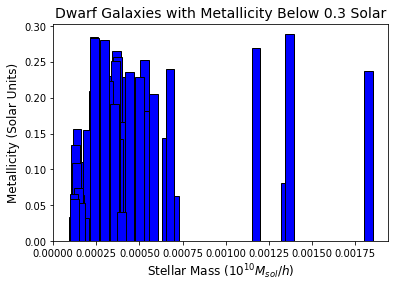

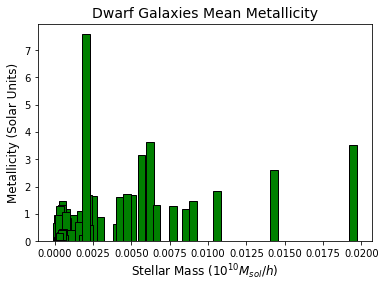

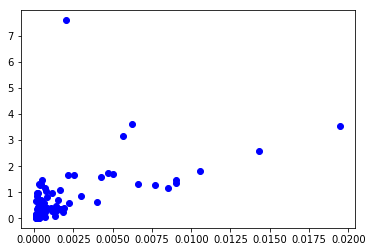

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.bar(stellarmasscut,Z_cut,0.00005,color='blue',edgecolor='black')
plt.title('Dwarf Galaxies with Metallicity Below 0.3 Solar',fontsize=14)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 12)
plt.ylabel('Metallicity (Solar Units)',fontsize = 12)

plt.figure(2)
plt.bar(stellarmass,Z_dwarf,0.0005,color='green',edgecolor='black')
plt.title('Dwarf Galaxies Mean Metallicity',fontsize=14)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 12)
plt.ylabel('Metallicity (Solar Units)',fontsize = 12)

plt.figure(3)
plt.plot(stellarmass, Z_dwarf, 'bo')


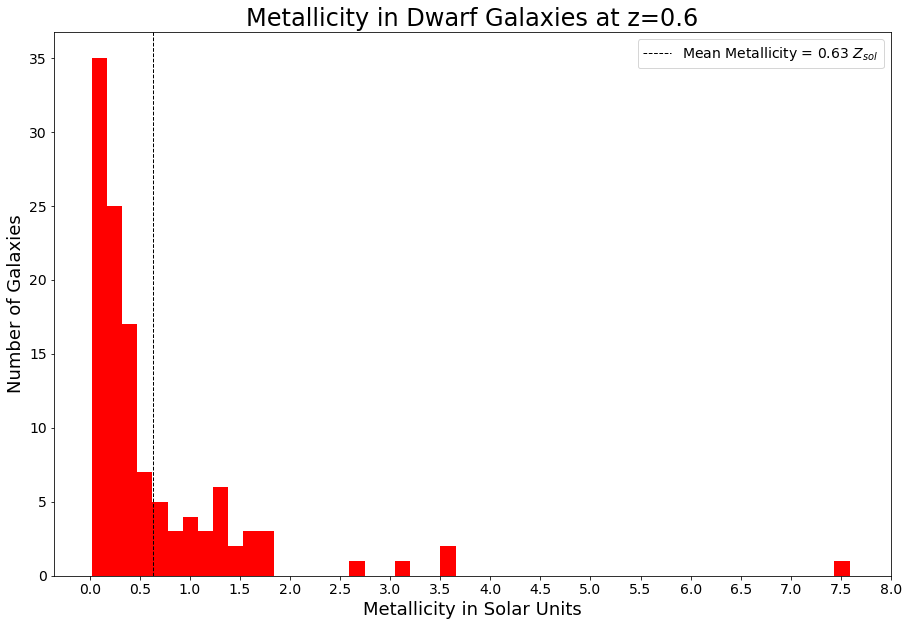

In [18]:
plt.figure(figsize=(15,10))
plt.hist(Z_dwarf,color='red',bins=50)
plt.title('Metallicity in Dwarf Galaxies at z=0.6',fontsize = 24)
plt.xlabel('Metallicity in Solar Units',fontsize=18)
plt.xticks(numpy.arange(0,8.5,0.5),fontsize=14)
plt.axvline(x=0.6286517318644068,linewidth=1, color='k', linestyle='--',label='Mean Metallicity = 0.63 $Z_{sol}$')
plt.yticks(fontsize=14)
#plt.xlim(xmin=0,xmax=1)
plt.ylabel('Number of Galaxies',fontsize=18)
plt.legend(fontsize=14)

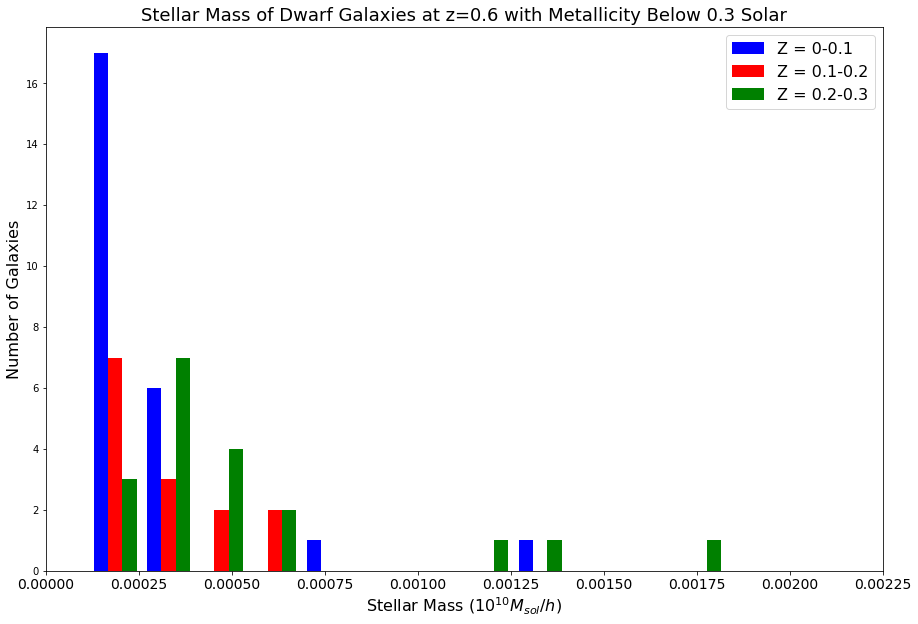

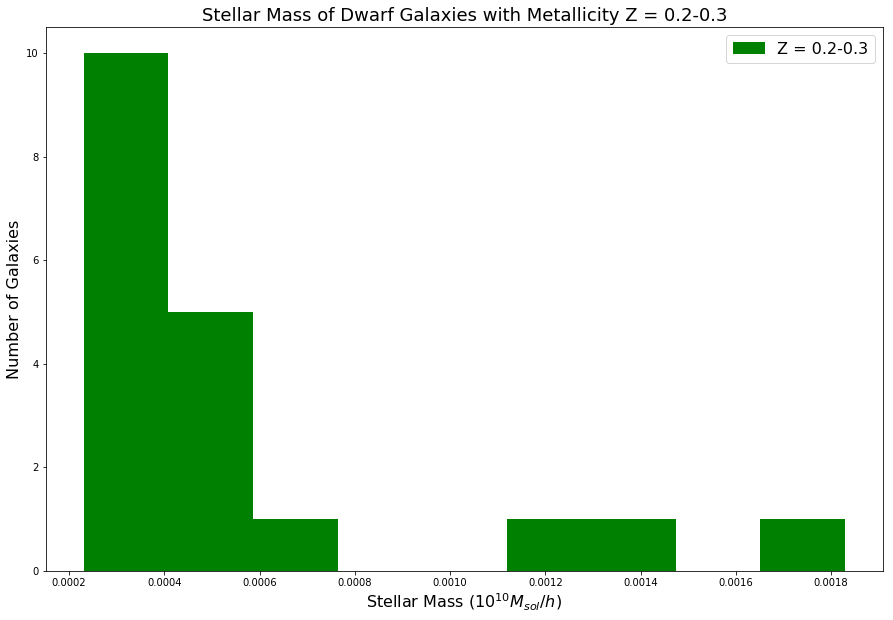

In [19]:
Z_0_1 = []
Z_1_2 = []
Z_2_3 = []
entry01 = []
entry12 = []
entry23 = []

for i in range(0,len(Z_dwarf)):
    if Z_dwarf[i]>=0 and Z_dwarf[i]<=0.1:
        Z_0_1.append(Z_dwarf[i])
        entry01.append(i)
    if Z_dwarf[i]>=0.1 and Z_dwarf[i]<=0.2:
        Z_1_2.append(Z_dwarf[i])
        entry12.append(i)
    if Z_dwarf[i]>=0.2 and Z_dwarf[i]<=0.3:
        Z_2_3.append(Z_dwarf[i])
        entry23.append(i)
        
        
stellarmass01 = []
stellarmass12 = []
stellarmass23 = []

for j in entry01:
    stellarmass01.append(stellarmass[j])
for k in entry12:
    stellarmass12.append(stellarmass[k])
for l in entry23:
    stellarmass23.append(stellarmass[l])
    

colors = ['blue', 'red', 'green']
names = ['Z = 0-0.1', 'Z = 0.1-0.2', 'Z = 0.2-0.3']
   
plt.figure(figsize=(15,10))
plt.hist([stellarmass01, stellarmass12, stellarmass23], bins = 12, color = colors, label=names)
plt.xticks(numpy.arange(0,0.0025,0.00025),fontsize=14)
#plt.yticks(numpy.arange(0,10,1),fontsize=14)
plt.title('Stellar Mass of Dwarf Galaxies at z=0.6 with Metallicity Below 0.3 Solar',fontsize=18)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})

# plt.figure(figsize=(15,10))
# plt.hist(stellarmass01, bins = 11, color = colors[0], label=names[0])
# #plt.xticks(numpy.arange(0,0.1,0.025),fontsize=14)
# #plt.yticks(numpy.arange(0,6,1),fontsize=14)
# plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0-0.1',fontsize=18)
# plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
# plt.ylabel('Number of Galaxies',fontsize = 16)
# plt.legend(prop={'size': 16})

# plt.figure(figsize=(15,10))
# plt.hist(stellarmass12, bins = 7, color = colors[1], label=names[1])
# #plt.xticks(numpy.arange(0.1,0.2,0.025),fontsize=14)
# #plt.yticks(numpy.arange(0,10,1),fontsize=14)
# plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0.1-0.2',fontsize=18)
# plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
# plt.ylabel('Number of Galaxies',fontsize = 16)
# plt.legend(prop={'size': 16})

plt.figure(figsize=(15,10))
plt.hist(stellarmass23, bins = 9, color = colors[2], label=names[2])
#plt.xticks(numpy.arange(0.2,0.3,0.025),fontsize=14)
#plt.yticks(numpy.arange(0,8,1),fontsize=14)
plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0.2-0.3',fontsize=18)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})

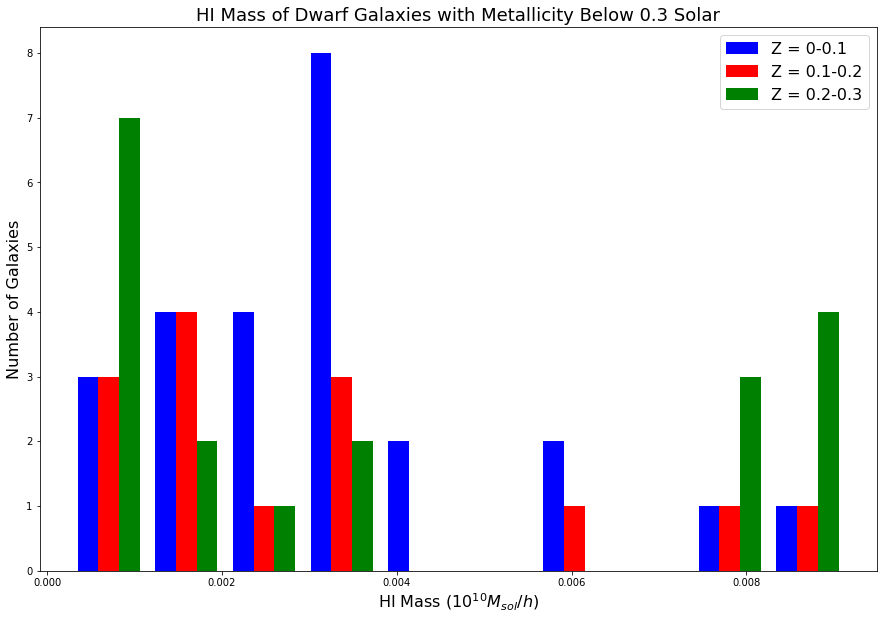

In [20]:
adjusted_HI_mass = []
for i in entry:
    adjusted_HI_mass.append(hi_mass[i])

HImass01 = []
HImass12 = []
HImass23 = []


for j in entry01:
    HImass01.append(hi_mass[j])
for k in entry12:
    HImass12.append(hi_mass[k])
for l in entry23:
    HImass23.append(hi_mass[l])

#print(HImass01)
colors = ['blue', 'red', 'green']
names = ['Z = 0-0.1', 'Z = 0.1-0.2', 'Z = 0.2-0.3']
   
plt.figure(figsize=(15,10))
plt.hist([HImass01, HImass12, HImass23], bins = 10, color = colors, label=names)
#plt.xticks(numpy.arange(0,0.35,0.025),fontsize=14)
plt.title('HI Mass of Dwarf Galaxies with Metallicity Below 0.3 Solar',fontsize=18)
plt.xlabel(r'HI Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})

In [21]:
def phistar(z) :
    phi0 = 0.0035
    phi1 = -2.2
    return phi0*(1+z)**phi1

def fracM(M, z) :
    M0 = 11.16
    M1 = 0.17
    M2 = -0.07

    hatM = 1e1**(M0 + M1*z + M2*z*z)
    return M/hatM

def phi(M,z=0.) :
    alpha0 = -1.18
    alpha1 = -0.082
    alpha = alpha0 + alpha1*z
    return math.log(10.) * phistar(z)*fracM(M,z)**(1.+alpha) * numpy.exp( -fracM(M,z))

def PanterZ(lgMstar) :

    logMc = 9.66
    Delta = 1.04
    A = -0.452
    B = 0.572
    out = numpy.tanh((lgMstar - logMc)/Delta)
    arg = A + B*out
    return 10**arg

def lamfit(Ptless,Zint):
# will return interpolated fit for lambda (fitting to O17 and Lamberts et al. 2016) given Z_HI or Z_dwarf (Zint) -- 
    Z = numpy.arange(0.001,1.,0.01)
    a = 3.9007870e-09
    b = 1.4792985e-07
    lamfit = a*((1./Z)**3) +b
    lamfit = lamfit/Ptless
    int = numpy.interp(Zint,Z,lamfit)
    ## now impose floor:
    lamint = numpy.minimum(int,1.5e-4*1.e1)
    print ("lamint=" + str(lamint))
    return lamint

def Richlambda(Zint):
# will read in file form Richard and return interpolated lambda values at Zint    
    #filename = "dat_lambda_factor.txt"  # old file don't use                     
    filename = "dat_lambda_M40cut.txt" # should have mass cut > 40 Msun           
    #filename = "dat_lambda.txt" # new file but doesn't have mass cut      

    data = loadtxt(filename,
              dtype=([('Z', 'float'), ('lambda', 'float'), ('av_mc', 'float'), ('V', 'float')]))

    lam = data["lambda"]/1.e-3
    Z = data["Z"]/0.0134

    lamint = numpy.interp(Zint,Z,lam)
    print ("lamint=" + str(lamint))
    return lamint

def TremontiZ(lgMstar, corr = 0.):
    lgZ = -1.492 + 1.847*lgMstar - 0.08026*(lgMstar**2) - 8.69 +corr
    return 10**lgZ

def AM13Z(lgMstar,OHasym,Mto,gamma):
    Mstar = 10**lgMstar
    lgZ = OHasym - numpy.log10(1.+(Mto/Mstar)**gamma) - 8.69
    return 10**lgZ

def LeeZ(lgMstar):
    lgZ = 5.65 + 0.298*lgMstar - 8.66
    return 10**lgZ

def mratedwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,Phi_dwarf):
    #lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)                                          
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()


def mratedwarfZP(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zp) # leads to weird plot
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZAM13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum(),lmbda

def detectrdwarfZp(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zp)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zp)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zdwarf)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZAm13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZAM13)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZTrem)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,Phi_dwarf) :
#    lmbda = lamfit(Ptless,ZLee)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZLee)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)


In [22]:
####--------Set parameters and return merger rate, detection rate, and plots --------

ZHI = 0.35
print ("Z_HI=" + str(ZHI))

M51 = 3.98e10  ## from Leroy et al. 2008                                        

SFRM51 = 0.1 ## Bigiel et al. 2010, C11
ZM51 = 0.1  # C11
dt = 10.e9  # Bigiel et al. 2010 - depletion time
                                                 
Ptless = 1.e-3  # the fraction of black holes that merge within Hubble time

dlgM = 0.1
lgMstar = numpy.arange(5, 9.89, dlgM)
Mstar =1e1**lgMstar

Phi_dwarf = phi(Mstar,z=0)
print(Phi_dwarf)
ZTrem = TremontiZ(lgMstar,corr=-0.26)
ZPanter = PanterZ(lgMstar)
ZLee = LeeZ(lgMstar)

## from Andrews & Martini 2013:
#Mto = 10**32.65
#OHasym = 16.988
#gamma = 0.373
### first row for MZR in Table 4:
#Mto = 10**8.901
#OHasym = 8.798
#gamma = 0.64
### second row:
Mto = 8.253
OHasym = 8.726
gamma = 0.734
ZAM13 = AM13Z(lgMstar,OHasym,Mto,gamma)

###----------dwarf galaxy parameters ---------------

print ("------dwarfs---------")

Mhdwarf = 2.5e8  ## from O17 h516
SFRdwarf = 0.01
Zdwarf = 0.1
## the bigger one h603
# Mhdwarf = 7.8e9
# SFRdwarf = 1.
# Zdwarf = 0.4

Z_HI=0.35
[0.1035341  0.09933067 0.09529788 0.09142882 0.08771684 0.08415555
 0.08073885 0.07746084 0.07431592 0.07129866 0.06840388 0.06562661
 0.06296207 0.06040567 0.05795304 0.05559993 0.0533423  0.05117628
 0.04909811 0.04710423 0.04519118 0.04335567 0.04159452 0.03990468
 0.0382832  0.03672728 0.03523418 0.03380128 0.03242606 0.03110606
 0.02983893 0.02862236 0.02745412 0.02633202 0.02525393 0.02421774
 0.02322136 0.0222627  0.02133968 0.02045018 0.01959202 0.01876295
 0.01796064 0.0171826  0.01642618 0.01568854 0.01496657 0.0142569
 0.01355583]
------dwarfs---------


In [23]:
StellarMass = []
converted_stellar_mass = []
HImass = []
VirialMass = []
Metallicity = []
StarFormation= []
HaloID = []
LHAT = []

for i in range(1,len(all_data)):
    StellarMass.append(all_data[i][1])
    converted_stellar_mass.append(all_data[i][1]*1e10*0.704)
    HImass.append(all_data[i][5])
    VirialMass.append(all_data[i][3])
    Metallicity.append(all_data[i][7])
    StarFormation.append(all_data[i][8])
    HaloID.append(all_data[i][0])
    LHAT.append(all_data[i][6])
    
print(numpy.mean(StarFormation))


0.0037810149563559325


In [24]:
MratedwarfZP= mratedwarfZP(Mstar,1,Metallicity[0],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[0],Phi_dwarf)
print(MratedwarfZP)
MratedwarfZP1= mratedwarfZP(Mstar,10,Metallicity[0],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[0],Phi_dwarf)
print(MratedwarfZP1)

lamint=0.0
0.0
lamint=0.0
0.0


In [25]:
# This loops over all galaxies in the all_data array and calculates the merger rates and detection rates below
# It stores the merger rate and detection rate of Zdwarf as well as lambda into an array

MRATEDDWARFZDWARF = []
DRATEDDWARFZDWARF = []
DRATEDDWARFZLEE = []
DRATEDDWARFZP = []
DRATEDDWARFZAM13 = []
DRATEDDWARFZTREM = []
LAMBDA = []

for i in range(0,len(Metallicity)):
    
    print('---------------------------------HALO  '+str(HaloID[i])+'----------------------------------------')

    MratedwarfZP= mratedwarfZP(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Panter = " + str(MratedwarfZP*1e3**3/dt)) # conversion to Gpc-3 and rate                                                                  
    print('')
    #MRATEDDWARFZP.append(MratedwarfZP*1e3**3/dt)
    
    MratedwarfZAM13= mratedwarfZAM13(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZAM13,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w AM13 = " + str(MratedwarfZAM13*1e3**3/dt)) 
    print('')
    
    MratedwarfZTrem= mratedwarfZTrem(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZTrem,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Tremonti = " + str(MratedwarfZTrem*1e3**3/dt))
    print('')
    
    DratedwarfZP = detectrdwarfZp(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Panter = " + str(DratedwarfZP.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZP.append(DratedwarfZP.sum()*1e3**3/dt)
    
    MratedwarfZdwarf, Lambda = mratedwarfZdwarf(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Zdwarf = " + str(MratedwarfZdwarf*1e3**3/dt)) 
    print('')
    MRATEDDWARFZDWARF.append(MratedwarfZdwarf*1e3**3/dt)
    LAMBDA.append(Lambda)
    
    
    DratedwarfZdwarf = detectrdwarfZdwarf(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Zdwarf = " + str(DratedwarfZdwarf.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZDWARF.append(DratedwarfZdwarf.sum()*1e3**3/dt)
    
    DratedwarfZAM13 = detectrdwarfZAm13(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZAM13,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with AM13 = " + str(DratedwarfZAM13.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZAM13.append(DratedwarfZAM13.sum()*1e3**3/dt)
    
    DratedwarfZTrem = detectrdwarfZTrem(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZTrem,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Tremonti = " + str(DratedwarfZTrem.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZTREM.append(DratedwarfZTrem.sum()*1e3**3/dt)
    
    DratedwarfZLee = detectrdwarfZLee(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZLee,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Lee = " + str(DratedwarfZLee.sum()*1e3**3/dt))
    DRATEDDWARFZLEE.append(DratedwarfZLee.sum()*1e3**3/dt)
    print('')
    print('')
    print('')
    print('')
    
    

---------------------------------HALO  259352----------------------------------------
lamint=0.0
merger rate dwarfs per cubic Gpc w Panter = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w AM13 = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Panter = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w Zdwarf = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Zdwarf = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with AM13 = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Lee = 0.0




---------------------------------HALO  469003----------------------------------------
lamint=0.0
merger rate dwarfs per cubic Gpc w Panter = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w AM13 = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Panter = 0.0

lamint=0.0
m

lamint=0.0004653956406067761
merger rate dwarfs per cubic Gpc w Panter = 13.697686745434899

lamint=0.0004653956406067761
merger rate dwarfs per cubic Gpc w AM13 = 13.697686745434899

lamint=0.0004653956406067761
merger rate dwarfs per cubic Gpc w Tremonti = 13.697686745434899

lamint=0.0004653956406067761
detection rate dwarfs per cubic Gpc with Panter = 59.468733455628296

lamint=0.0004653956406067761
merger rate dwarfs per cubic Gpc w Zdwarf = 13.697686745434899

lamint=0.0004653956406067761
detection rate dwarfs per cubic Gpc with Zdwarf = 123.41740449943134

lamint=0.0004653956406067761
detection rate dwarfs per cubic Gpc with AM13 = 12.608050958702128

lamint=0.0004653956406067761
detection rate dwarfs per cubic Gpc with Tremonti = 33.82525120313227

lamint=0.0004653956406067761
detection rate dwarfs per cubic Gpc with Lee = 25.64242680842828




---------------------------------HALO  419924----------------------------------------
lamint=0.00029796716302732206
merger rate dwarfs 

lamint=0.0
merger rate dwarfs per cubic Gpc w Zdwarf = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Zdwarf = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with AM13 = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Lee = 0.0




---------------------------------HALO  295420----------------------------------------
lamint=0.0002565117387908193
merger rate dwarfs per cubic Gpc w Panter = 1.0784619771340735

lamint=0.0002565117387908193
merger rate dwarfs per cubic Gpc w AM13 = 1.0784619771340735

lamint=0.0002565117387908193
merger rate dwarfs per cubic Gpc w Tremonti = 1.0784619771340735

lamint=0.0002565117387908193
detection rate dwarfs per cubic Gpc with Panter = 4.68216050287401

lamint=0.0002565117387908193
merger rate dwarfs per cubic Gpc w Zdwarf = 1.0784619771340735

lamint=0.0002565117387908193
detection rate dwarfs per cubic Gpc with Zdwarf = 2.9570310206481074

lamint=0.0002565117387


---------------------------------HALO  654644----------------------------------------
lamint=0.0004639204863693988
merger rate dwarfs per cubic Gpc w Panter = 8.370403860152956

lamint=0.0004639204863693988
merger rate dwarfs per cubic Gpc w AM13 = 8.370403860152956

lamint=0.0004639204863693988
merger rate dwarfs per cubic Gpc w Tremonti = 8.370403860152956

lamint=0.0004639204863693988
detection rate dwarfs per cubic Gpc with Panter = 36.340246738471755

lamint=0.0004639204863693988
merger rate dwarfs per cubic Gpc w Zdwarf = 8.370403860152956

lamint=0.0004639204863693988
detection rate dwarfs per cubic Gpc with Zdwarf = 265.0900909751299

lamint=0.0004639204863693988
detection rate dwarfs per cubic Gpc with AM13 = 7.70454751776956

lamint=0.0004639204863693988
detection rate dwarfs per cubic Gpc with Tremonti = 20.66998745870009

lamint=0.0004639204863693988
detection rate dwarfs per cubic Gpc with Lee = 15.66961431735845




---------------------------------HALO  191143----------

lamint=0.00034371584699453595
merger rate dwarfs per cubic Gpc w Zdwarf = 11.151737866194289

lamint=0.00034371584699453595
detection rate dwarfs per cubic Gpc with Zdwarf = 58.28428433946883

lamint=0.00034371584699453595
detection rate dwarfs per cubic Gpc with AM13 = 10.264629488765673

lamint=0.00034371584699453595
detection rate dwarfs per cubic Gpc with Tremonti = 27.538250924099934

lamint=0.00034371584699453595
detection rate dwarfs per cubic Gpc with Lee = 20.876344110874626




---------------------------------HALO  573168----------------------------------------
lamint=0.00034371584699453595
merger rate dwarfs per cubic Gpc w Panter = 9.392625015245716

lamint=0.00034371584699453595
merger rate dwarfs per cubic Gpc w AM13 = 9.392625015245716

lamint=0.00034371584699453595
merger rate dwarfs per cubic Gpc w Tremonti = 9.392625015245716

lamint=0.00034371584699453595
detection rate dwarfs per cubic Gpc with Panter = 40.778236782679464

lamint=0.00034371584699453595
merger rate 

lamint=0.0
detection rate dwarfs per cubic Gpc with Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Lee = 0.0




---------------------------------HALO  522982----------------------------------------
lamint=0.00030477434801639354
merger rate dwarfs per cubic Gpc w Panter = 8.074155850824743

lamint=0.00030477434801639354
merger rate dwarfs per cubic Gpc w AM13 = 8.074155850824743

lamint=0.00030477434801639354
merger rate dwarfs per cubic Gpc w Tremonti = 8.074155850824743

lamint=0.00030477434801639354
detection rate dwarfs per cubic Gpc with Panter = 35.05408110839765

lamint=0.00030477434801639354
merger rate dwarfs per cubic Gpc w Zdwarf = 8.074155850824743

lamint=0.00030477434801639354
detection rate dwarfs per cubic Gpc with Zdwarf = 26.22225399801191

lamint=0.00030477434801639354
detection rate dwarfs per cubic Gpc with AM13 = 7.431865708976628

lamint=0.00030477434801639354
detection rate dwarfs per cubic Gpc with Tremonti = 19.938428654634556

lamint=0.00

lamint=0.00040761950897836056
merger rate dwarfs per cubic Gpc w Zdwarf = 30.820752478717285

lamint=0.00040761950897836056
detection rate dwarfs per cubic Gpc with Zdwarf = 585.2958523993067

lamint=0.00040761950897836056
detection rate dwarfs per cubic Gpc with AM13 = 28.368995806296986

lamint=0.00040761950897836056
detection rate dwarfs per cubic Gpc with Tremonti = 76.10917918017216

lamint=0.00040761950897836056
detection rate dwarfs per cubic Gpc with Lee = 57.69725241231599




---------------------------------HALO  124625----------------------------------------
lamint=0.0
merger rate dwarfs per cubic Gpc w Panter = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w AM13 = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Panter = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w Zdwarf = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Zdwarf = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with

lamint=0.00023629135984349703
detection rate dwarfs per cubic Gpc with Panter = 6.090975599117156

lamint=0.00023629135984349703
merger rate dwarfs per cubic Gpc w Zdwarf = 1.4029603605573036

lamint=0.00023629135984349703
detection rate dwarfs per cubic Gpc with Zdwarf = 3.5949048395840584

lamint=0.00023629135984349703
detection rate dwarfs per cubic Gpc with AM13 = 1.291356420078797

lamint=0.00023629135984349703
detection rate dwarfs per cubic Gpc with Tremonti = 3.464489114536334

lamint=0.00023629135984349703
detection rate dwarfs per cubic Gpc with Lee = 2.6263783826642477




---------------------------------HALO  256997----------------------------------------
lamint=0.0
merger rate dwarfs per cubic Gpc w Panter = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w AM13 = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Panter = 0.0

lamint=0.0
merger rate dwarfs per cubic Gpc w Zdwarf = 0.0

lamint=0.0
detect


lamint=0.0004270683448878684
merger rate dwarfs per cubic Gpc w Zdwarf = 13.61671630726608

lamint=0.0004270683448878684
detection rate dwarfs per cubic Gpc with Zdwarf = 356.8735430312726

lamint=0.0004270683448878684
detection rate dwarfs per cubic Gpc with AM13 = 12.53352162907491

lamint=0.0004270683448878684
detection rate dwarfs per cubic Gpc with Tremonti = 33.62530171808505

lamint=0.0004270683448878684
detection rate dwarfs per cubic Gpc with Lee = 25.490848036554098




---------------------------------HALO  478825----------------------------------------
lamint=0.00042816789273967176
merger rate dwarfs per cubic Gpc w Panter = 26.078443062027112

lamint=0.00042816789273967176
merger rate dwarfs per cubic Gpc w AM13 = 26.078443062027112

lamint=0.00042816789273967176
merger rate dwarfs per cubic Gpc w Tremonti = 26.078443062027112

lamint=0.00042816789273967176
detection rate dwarfs per cubic Gpc with Panter = 113.21999168292632

lamint=0.00042816789273967176
merger rate dwar

In [13]:
print(DRATEDDWARFZDWARF)

[0.0, 0.0, 332.12079047062076, 0.0, 54.997465425393564, 413.5717521465197, 2.2697777877338083, 54.104927382756564, 99.33130155511157, 24.917896335712836, 352.87929087889563, 1.0887056857212136, 141.22287393318058, 122.39548975684004, 8.756245740594634, 256.68034716561897, 19.836950892223463, 0.0, 32.616191882351465, 0.0, 5.269057320801511, 13.224104822631912, 0.0, 3.1227605018572047, 0.0, 123.41740449943134, 103.46070760579764, 36.22249044431305, 0.04548827967790098, 0.0, 4.031421460734326, 18.621173130655638, 1.3706600371144138, 0.0, 0.041377782255555474, 0.07269372813538899, 0.00584246772394568, 0.0, 0.0, 2.9570310206481074, 2.5077876225407487, 0.0, 0.0, 0.0, 8.255707504070626, 0.0, 0.0, 285.87674493359236, 0.0, 0.016938004413915728, 0.0, 265.0900909751299, 0.0, 8.937633011179075, 241.8577714991536, 0.0, 0.0, 52.814009161876626, 450.8000217873818, 0.0, 0.5953664450557726, 0.0, 84.38048896379101, 0.0, 58.28428433946883, 44.965813344477574, 6.545175746880306, 176.17488735788328, 443.68

In [14]:
with open("dwarf_merger_rate_z=0.6.txt", "w") as myfile:
    for i in range(0,len(Metallicity)):
        ids = HaloID[i],VirialMass[i],StellarMass[i],HImass[i], Metallicity[i], StarFormation[i], LAMBDA[i], MRATEDDWARFZDWARF[i], DRATEDDWARFZDWARF[i]
        myfile.write(str(ids)+'\n')

In [26]:
# This finds the merger rate and detection rate of galaxies that have metallicities below 0.3 solar
# It creates arrays for the merger rate, detection rate, and index value that these galaxies reside in

merger_rate_lowz = []
detection_rate_lowz = []
detect_LEE = []
detect_ZP = []
detect_ZAM13 = []
detect_Ztrem = []
sfr_lowz = []
entry2 = []

for i in range(0,len(MRATEDDWARFZDWARF)):
    if Metallicity[i]<=0.3:
        merger_rate_lowz.append(MRATEDDWARFZDWARF[i])
        detection_rate_lowz.append(DRATEDDWARFZDWARF[i])
        detect_LEE.append(DRATEDDWARFZLEE[i])
        detect_ZP.append(DRATEDDWARFZP[i])
        detect_ZAM13.append(DRATEDDWARFZAM13[i])
        detect_Ztrem.append(DRATEDDWARFZTREM[i])
        sfr_lowz.append(StarFormation[i])
        entry2.append(i)

newHaloID = []
newVirialMass = []
newStellarMass = []
newHImass = []
newMetallicity = []
newStarFormation = []
newMRATEDDWARFZDWARF = []
newDRATEDDWARFZDWARF = []
newLAMBDA = []

HaloID = numpy.array(HaloID)
VirialMass = numpy.array(VirialMass)
StellarMass = numpy.array(StellarMass)
HImass = numpy.array(HImass)
Metallicity = numpy.array(Metallicity)
StarFormation = numpy.array(StarFormation)
MRATEDDWARFZDWARF = numpy.array(MRATEDDWARFZDWARF)
DRATEDDWARFZDWARF = numpy.array(DRATEDDWARFZDWARF)
LAMBDA = numpy.array(LAMBDA)

# This loops over the indices that include galaxies with metallicities below 0.3 solar and extracts the following information and stores them into new arrays
for i in entry2:
    newHaloID.append(HaloID[i])
    newVirialMass.append(VirialMass[i])
    newStellarMass.append(StellarMass[i])
    newHImass.append(HImass[i])
    newMetallicity.append(Metallicity[i])
    newStarFormation.append(StarFormation[i])
    newMRATEDDWARFZDWARF.append(MRATEDDWARFZDWARF[i]) 
    newDRATEDDWARFZDWARF.append(DRATEDDWARFZDWARF[i])
    newLAMBDA.append(LAMBDA[i])
    
    
#print(newHaloID)
    
print(numpy.max(detection_rate_lowz))
        
print(numpy.mean(merger_rate_lowz))
print('')
print(numpy.mean(detection_rate_lowz))
print('')
print('Zdwarf :',numpy.sum(detection_rate_lowz))
print('')
print('Lee: ',numpy.sum(detect_LEE))
print('')
print('ZP: ', numpy.sum(detect_ZP))
print('')
print('ZAM13: ',numpy.sum(detect_ZAM13))
print('')
print('Ztrem: ', numpy.sum(detect_Ztrem))
print(numpy.mean(sfr_lowz))
    
    


1767.2901931652839
24.149489938305134

294.5644324052239

Zdwarf : 17084.737079502986

Lee:  2622.0915475231077

ZP:  6081.0337687950405

ZAM13:  1289.2486384591066

Ztrem:  3458.834295801789
0.0025390017787931033


In [ ]:
for i in range(0,len(LHAT)):
    metallicity_plot('cutout_'+str(HaloID[i])+'.hdf5',LHAT[i]) 

In [ ]:
# Illustris

from numpy import mean, size, zeros, where, transpose
from scipy import linspace
from matplotlib.pyplot import hist

log_mstar = []
    
for j in converted_stellar_mass:
    LOG_mstar = numpy.log10(j)
    log_mstar.append(LOG_mstar)
    
mu = numpy.mean(converted_stellar_mass)
sigma = numpy.std(converted_stellar_mass)

x = converted_stellar_mass

x_max = max(x)
x_min = min(x)
N_MIN = 4   #Minimum number of bins (integer)
            #N_MIN must be more than 1 (N_MIN > 1).
N_MAX = 50  #Maximum number of bins (integer)
N = range(N_MIN,N_MAX) # #of Bins
N = numpy.array(N)
D = (x_max-x_min)/N    #Bin size vector
C = numpy.zeros(shape=(size(D),1))

#Computation of the cost function
for i in range(size(N)):
    edges = linspace(x_min,x_max,N[i]+1) # Bin edges
    ki = hist(x,edges) # Count # of events in bins
    ki = ki[0]    
    k = mean(ki) #Mean of event count
    v = sum((ki-k)**2)/N[i] #Variance of event count
    C[i] = (2*k-v)/((D[i])**2) #The cost Function

#Optimal Bin Size Selection

cmin = min(C)
idx  = where(C==cmin)
idx = int(idx[0])
optD = D[idx]

edges = linspace(x_min,x_max,N[idx]+1)
fig = plt.figure(3)

fig, ax = plt.subplots()

# Histogram
n, bins, patches = ax.hist(x,edges)

# Best fit line
# y = mlab.normpdf(bins, mu, sigma)
# ax.plot(bins, y, '--')
ax.set_xlabel('Stellar Masses')
ax.set_ylabel('Number of Galaxies')
plt.title("Illustris Stellar Mass Distribution (Initial Mass Cuts) ($10^{10} M_{sol}/h$)")
print("The mean is:",mu,'and the standard deviation is:',sigma)

In [ ]:
mu = numpy.mean(log_mstar)
sigma = numpy.std(log_mstar)

x = log_mstar

x_max = max(x)
x_min = min(x)
N_MIN = 4   #Minimum number of bins (integer)
            #N_MIN must be more than 1 (N_MIN > 1).
N_MAX = 50  #Maximum number of bins (integer)
N = range(N_MIN,N_MAX) # #of Bins
N = numpy.array(N)
D = (x_max-x_min)/N    #Bin size vector
C = numpy.zeros(shape=(size(D),1))

#Computation of the cost function
for i in range(size(N)):
    edges = linspace(x_min,x_max,N[i]+1) # Bin edges
    ki = hist(x,edges) # Count # of events in bins
    ki = ki[0]    
    k = mean(ki) #Mean of event count
    v = sum((ki-k)**2)/N[i] #Variance of event count
    C[i] = (2*k-v)/((D[i])**2) #The cost Function

#Optimal Bin Size Selection

cmin = min(C)
idx  = where(C==cmin)
idx = int(idx[0])
optD = D[idx]

edges = linspace(x_min,x_max,N[idx]+1)
fig = plt.figure(3)

fig, ax = plt.subplots()

# Histogram
n, bins, patches = ax.hist(x,edges)

# Best fit line
# y = mlab.normpdf(bins, mu, sigma)
# ax.plot(bins, y, '--')
ax.set_xlabel(r'$Log(M_{HI}/M_{sol})$')
ax.set_ylabel('Number of Galaxies')
#plt.xlim(6,12)
plt.title("Log Illustris Stellar Mass Distribution (Initial Mass Cuts)")
print("The mean is:",mu,'and the standard deviation is:',sigma)

In [ ]:
def phi(M,h):
    phistar = 4.8e-03/h**3
    Mstar = 10**(9.96 - 2.0*numpy.log10(h))
    alpha = -1.33
    phi = numpy.log(10)*phistar*((M/Mstar)**(alpha+1.))*numpy.exp(-M/Mstar)
    return phi # not converted yet

In [ ]:
# Illustris

converted_stellar_mass = numpy.array(converted_stellar_mass)
Phi_illustris = phi(converted_stellar_mass,0.704)
#print(Phi_illustris)

plt.plot(log_mstar,numpy.log10(Phi_illustris),'bo')
#plt.xlim(6,11)
#plt.ylim(-2.5,0)
plt.xlabel(r'$Log(M_{HI}/M_{sol})$')
plt.ylabel('Log(phi)')
plt.title('Illustris Stellar Mass Function')